# MILESTONE 2
=====================================================================================================================
  
MILESTONE 2  
  
  
Nama  : Lungun Ali Rusky Simbolon  
Batch : HCK-013  

Dataset Kampanye Pemasaran berisi informasi tentang pelanggan dan respons mereka terhadap kampanye pemasaran. Data ini mencakup informasi demografis, riwayat pembelian, dan respons terhadap kampanye pemasaran sebelumnya. Tujuan dari dataset ini adalah untuk memungkinkan perusahaan memprediksi pelanggan mana yang kemungkinan besar akan merespons kampanye pemasaran.

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data\

https://huggingface.co/spaces/LungunSimbolon/Milestone_2

=====================================================================================================================

## 2. IMPORT LIBRARIES

In [735]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
import pickle 
import json
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## 3. Data Loading

In [672]:
'''Load data dari csv'''
df = pd.read_csv('marketing_campaign.csv', delimiter=';')

In [673]:
'''Menampilkan data dan copy data sebagai backup'''

df1 = df.copy()
pd.set_option('display.max_columns', None) #display seluruh kolom pada data
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [753]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


| Kolom                 | Keterangan                                                            |
|-----------------------|-----------------------------------------------------------------------|
| AcceptedCmp1          | 1 if customer accepted the offer in the 1st campaign, 0 otherwise     | 
| AcceptedCmp2          | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise     |  
| AcceptedCmp3          | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise     |  
| AcceptedCmp4          | 1 if customer accepted the offer in the 4th campaign, 0 otherwise     |  
| AcceptedCmp5          | 1 if customer accepted the offer in the 5th campaign, 0 otherwise     |  
| Complain              | 1 if customer complained in the last 2 years                          |
| DtCustomer            | Date of customer’s enrollment with the company                        |
| Education             | Customer’s level of education                                         |
| Marital               | Customer’s marital status                                             |
| Kidhome               | Number of small children in customer’s household                      |
| Teenhome              | Number of teenagers in customer’s household                           |
| Income                | Customer’s yearly household income                                    |
| MntFishProducts       | Amount spent on fish products in the last 2 years                     |
| MntMeatProducts       | Amount spent on meat products in the last 2 years                     |
| MntFruits             | Amount spent on fruit products in the last 2 years                    |
| MntSweetProducts      | Amount spent on sweet products in the last 2 years                    |
| MntWines              | Amount spent on wine products in the last 2 years                     |
| MntGoldProds          | Amount spent on gold products in the last 2 years                     |
| NumDealsPurchases     | Number of purchases made with a discount                              |
| NumCatalogPurchases   | Number of purchases made using a catalog                              |
| NumStorePurchases     | Number of purchases made directly in stores                           |
| NumWebPurchases       | Number of purchases made through the company’s website                |
| NumWebVisitsMonth     | Number of visits to the company’s website in the last month           |
| Recency               | Number of days since the last purchase                                |
| Response (target)     | 1 if customer accepted the offer in the last campaign, 0 otherwise    |

## 4. Exploratory Data Analysis (EDA)

In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

    Terdapat 28 kolom dengan total 2240 baris data dimana kolom-kolom tersebut terdiri dari 3 kolom bertipe Object dan sisanya bertipe Integer.

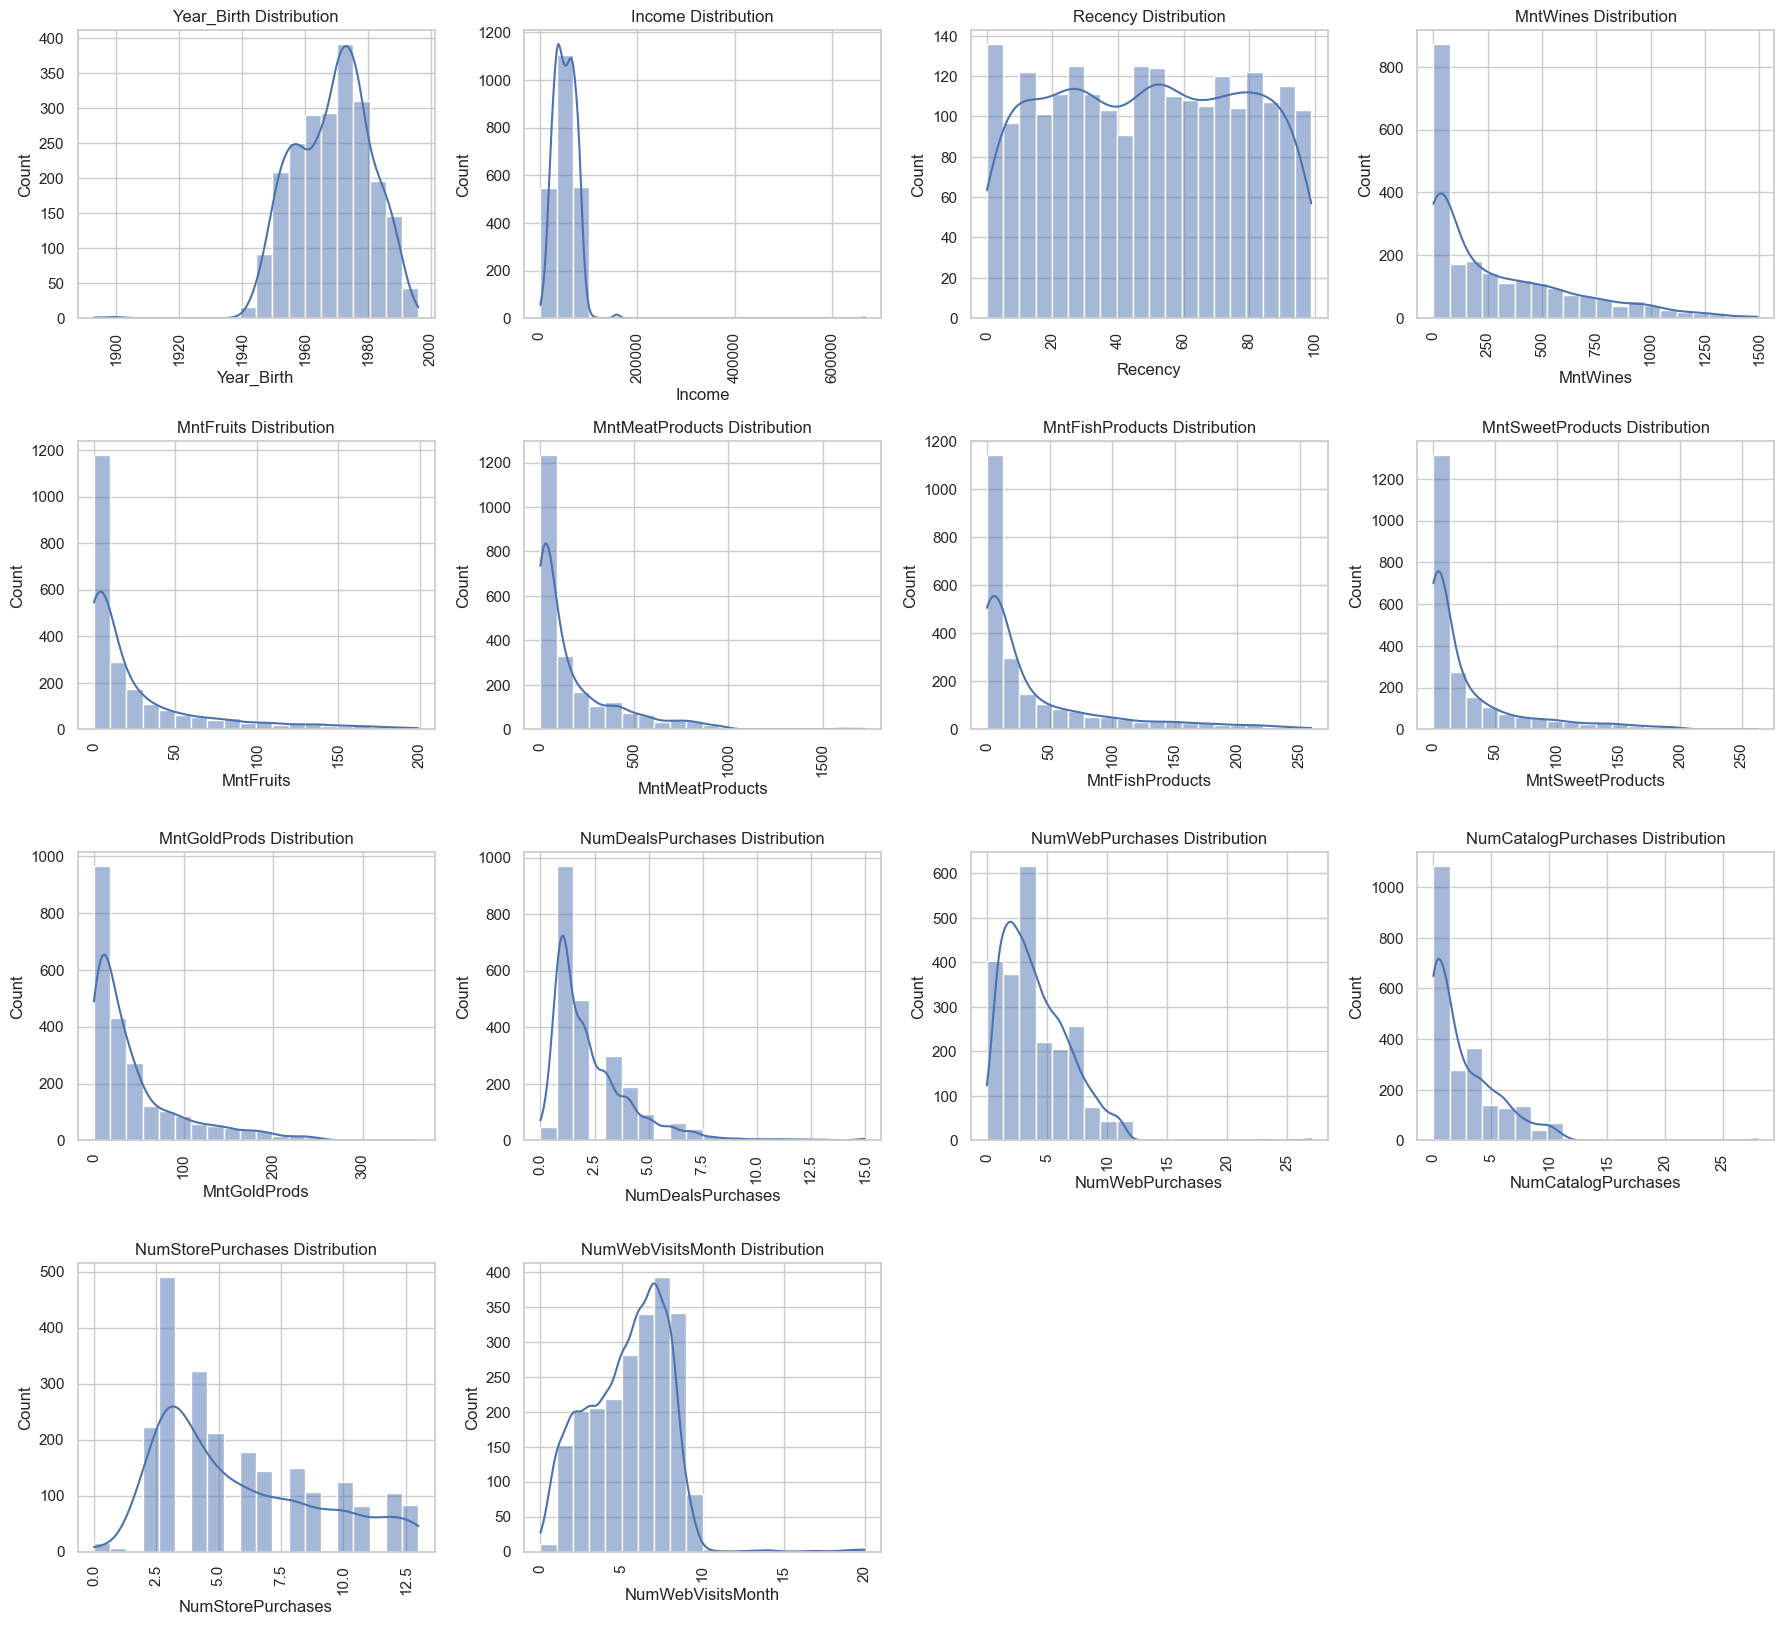

In [675]:
'''Membuat grafik distribusi masing-masing kolom numerikal'''

#memilih kolom numerikal
numeric_cols = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 
                'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                'NumWebVisitsMonth']

sns.set_theme(style="whitegrid")
# Mengatur ukuran gambar
plt.figure(figsize=(18, 24))

# Membuat histogram untuk kolom-kolom numerik
for i, col in enumerate(numeric_cols, +1):
    plt.subplot(6, 4, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


    Berdasarkan tahun kelahiran, paling banyak ada di antara tahun 1960 - 1980. Distribusi untuk pembelian wine, buah, produk daging, produk ikan, produk makanan manis, perhiasan cenderung turun frekuensinya berbanding dengan jumlah pembelanjaannya.

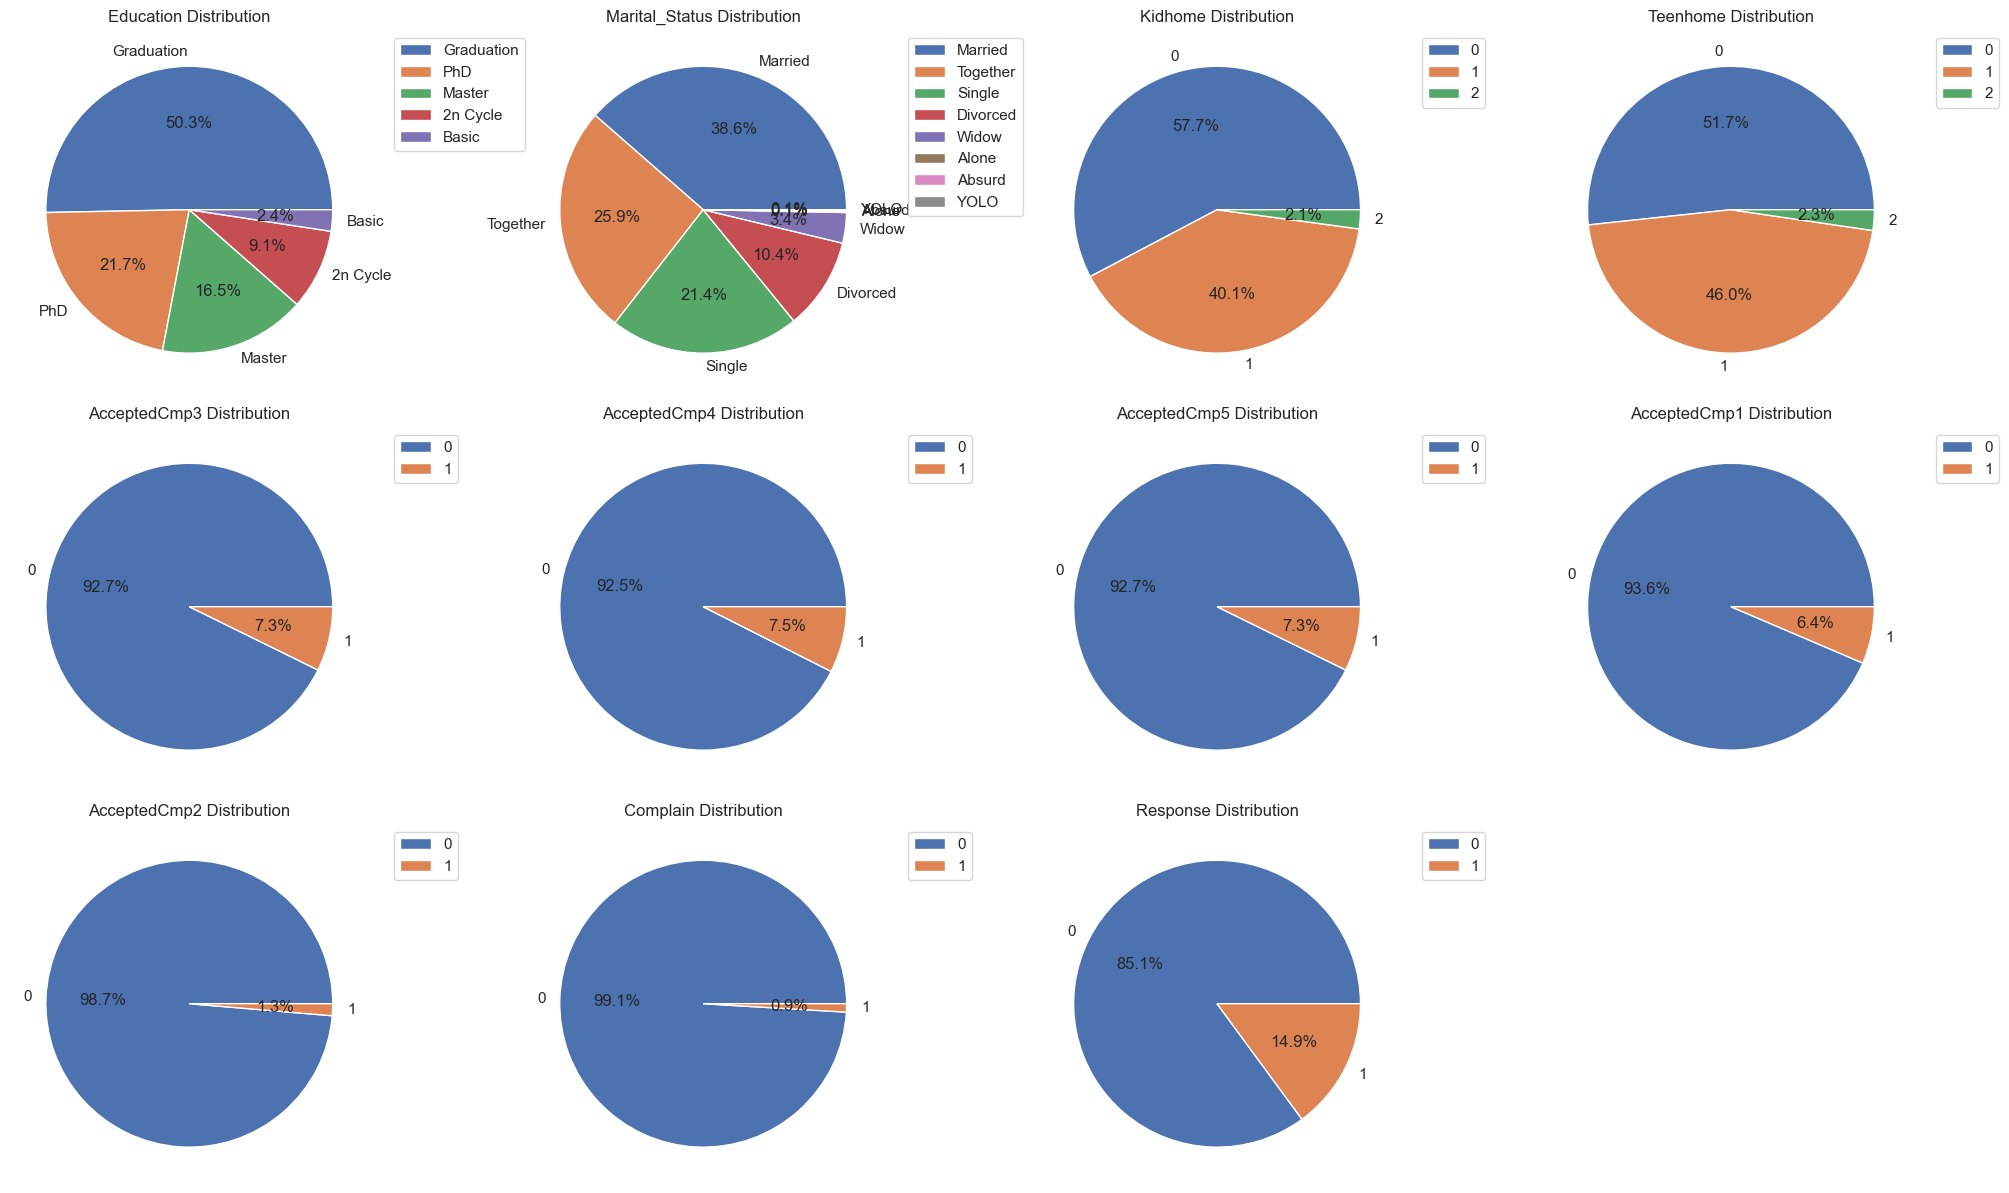

In [676]:
'''Membuat grafik distribusi masing-masing kolom numerikal'''

#memilih kolom kategorikal
categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',	'AcceptedCmp1',
                    'AcceptedCmp2',	'Complain', 'Response']


# Mengatur ukuran gambar
plt.figure(figsize=(20, 24))

# Membuat pie chart untuk kolom-kolom kategorikal
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 4, i)  # Menetapkan subplot sesuai dengan iterasi
    counts = df[col].value_counts()  # Menghitung jumlah nilai unik
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')  # Membuat pie chart
    plt.title(f'{col} Distribution')  # Menambahkan judul subplot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Menyusun legend

plt.tight_layout()
plt.show()


    Pendidikan dari calon customer yang terdata terdiri dari basic, 2n Cycle, Master, PhD, Graduation. Kolom Marital Status memiliki data berupa Absurd dan Yolo. Kedua data tersebut tidak diketahui artinya sehingga akan di drop, sisanya adalah status pernikahan calon customer mulai dari married (menikah), together (tinggal bersama namun tidak menikah), single (lajang), divorced (bercerai), widow (janda), alone (tidak menikah). Kolom tersebut didominasi oleh calon customer yang sudah menikah dan disusul dengan yang tinggal bersama namun tidak menikah. Calon customer kebanyakan tidak memiliki anak terlihat dari grafik Kidhome dan Teenhome yang didominasi oleh angka 0. Rata-rata calon customer menerima penawaran ketika ditawari di campaign ke 4 dimana terlihat dari penerimaannya sebesar 7.5%.

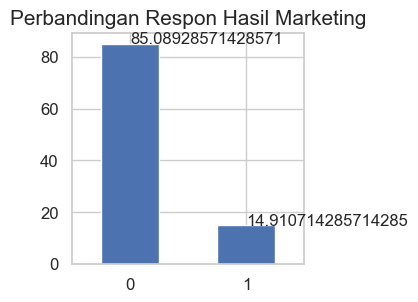

In [677]:
def_cnt = (df.Response.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(3,3))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Perbandingan Respon Hasil Marketing", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

    Perbandingan customer yang menerima penawaran adalah 85.089% tidak menerima (0) dan 14.91% menerima penawaran (1). Berdasarkan angka tersebut maka perusahaan berusaha untuk meningkatkan conversion rate dengan memprediksi calon customer mana yang memiliki kemungkinan untuk membeli sehingga dalam proses marketing bisa lebih efektif.

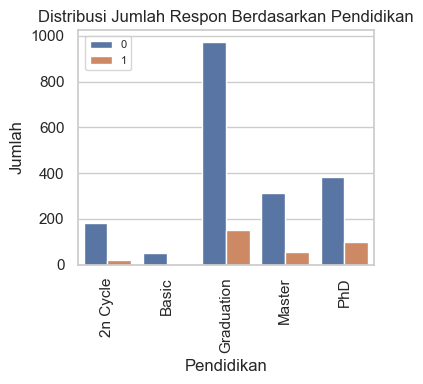

In [678]:
# Membuat visualisasi dengan cara pertama-tama mengelompokkan berdasarkan kategori dan melakukan perhitungan count
education_count = df.groupby(['Education', 'Response']).size().reset_index(name='Count').sort_values(by=["Education", "Count"], ascending=True)

plt.figure(figsize=(4, 4))
ax = sns.barplot(data=education_count, x='Education', y='Count', hue='Response')
plt.legend(loc='best', bbox_to_anchor=(0.2, 1), prop={'size': 8})
plt.xticks(rotation=90)
plt.title("Distribusi Jumlah Respon Berdasarkan Pendidikan")
plt.xlabel("Pendidikan")
plt.ylabel("Jumlah")
plt.tight_layout()

# Memunculkan visualisasi
plt.show()


    Tingkat pendidikan didominasi oleh gelar sarjana (graduation) dengan frekuensi hampir seribu orang dan yang paling sedikit adalah basic.
    Penawaran juga paling banyak dilakukan pada calon customer yang bergelar sarjana dimana berbanding lurus dengan persentase penerimaannya paling tinggi diantara tingkat pendidikan lainnya.

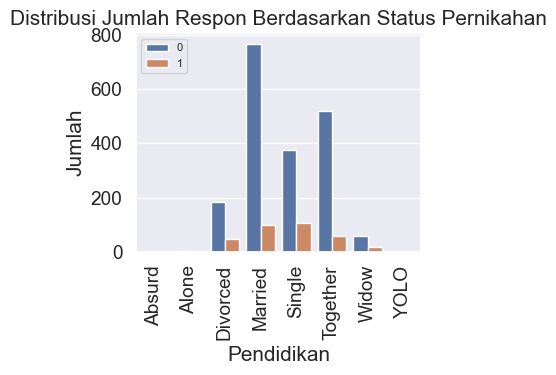

In [760]:
# Membuat visualisasi dengan cara pertama-tama mengelompokkan berdasarkan kategori dan melakukan perhitungan count
Marital_Status_count = df.groupby(['Marital_Status', 'Response']).size().reset_index(name='Count').sort_values(by=["Marital_Status", "Count"], ascending=True)

plt.figure(figsize=(4, 4))
ax = sns.barplot(data=Marital_Status_count, x='Marital_Status', y='Count', hue='Response')
plt.legend(loc='best', bbox_to_anchor=(0.2, 1), prop={'size': 8})
plt.xticks(rotation=90)
plt.title("Distribusi Jumlah Respon Berdasarkan Status Pernikahan")
plt.xlabel("Pendidikan")
plt.ylabel("Jumlah")
plt.tight_layout()

# Memunculkan visualisasi
plt.show()


    Penawaran terbanyak dilakukan kepada calon customer yang berstatus menikah disusul oleh 'together' dan single. Meskipun banyak ditawarkan kepada mereka yang sudah menikah namun tingkat penerimaan lebih besar pada mereka yang berstatus lajang. Hal tersebut mengindikasikan bahwa program kampanye yang dilakukan kemungkinan besar lebih cocok kepada mereka yang berstatus lajang ketimbang dari status pernikahan lainnya, hal ini terlihat dari perbandingan penolakan dan penerimannya. Frekuensi penolakan dari mereka yang lajang berada diurutan ketiga namun penerimaannya berada di urutan pertama.

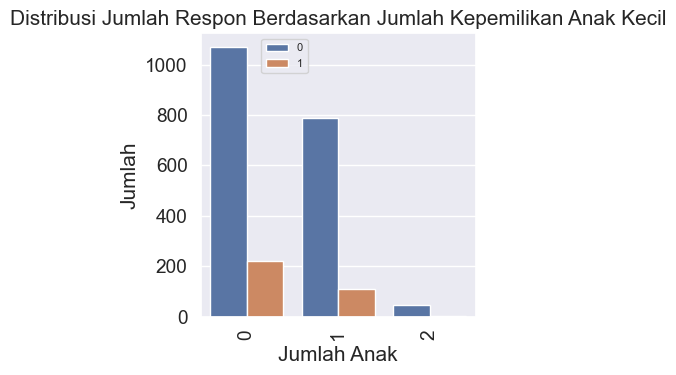

In [763]:
# Membuat visualisasi dengan cara pertama-tama mengelompokkan berdasarkan kategori dan melakukan perhitungan count
Kidhome_count = df.groupby(['Kidhome', 'Response']).size().reset_index(name='Count').sort_values(by=["Kidhome", "Count"], ascending=True)

plt.figure(figsize=(4, 4))
ax = sns.barplot(data=Kidhome_count, x='Kidhome', y='Count', hue='Response')
plt.legend(loc='best', bbox_to_anchor=(0.2, 1), prop={'size': 8})
plt.xticks(rotation=90)
plt.title("Distribusi Jumlah Respon Berdasarkan Jumlah Kepemilikan Anak Kecil")
plt.xlabel("Jumlah Anak")
plt.ylabel("Jumlah")
plt.tight_layout()

# Memunculkan visualisasi
plt.show()


    Berdasarkan data ini ditemukan bahwa calon customer yang tidak memiliki anak kecil di rumah cenderung lebih mudah dalam menerima penawaran dari tim marketing ketimbang mereka yang memiliki anak kecil.

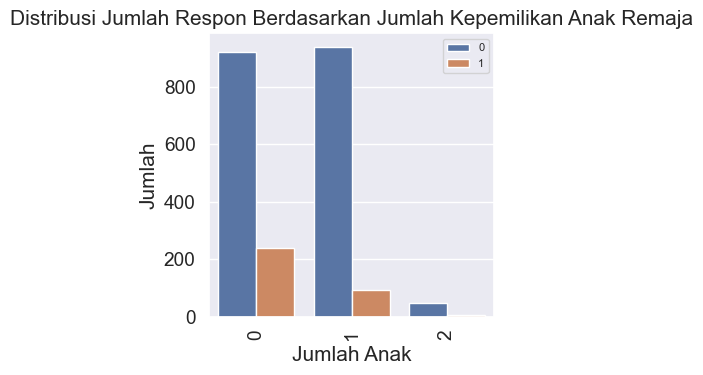

In [764]:
# Membuat visualisasi dengan cara pertama-tama mengelompokkan berdasarkan kategori dan melakukan perhitungan count
Teenhome_count = df.groupby(['Teenhome', 'Response']).size().reset_index(name='Count').sort_values(by=["Teenhome", "Count"], ascending=True)

plt.figure(figsize=(4, 4))
ax = sns.barplot(data=Teenhome_count, x='Teenhome', y='Count', hue='Response')
plt.legend(loc='best', bbox_to_anchor=(1, 1), prop={'size': 8})
plt.xticks(rotation=90)
plt.title("Distribusi Jumlah Respon Berdasarkan Jumlah Kepemilikan Anak Remaja")
plt.xlabel("Jumlah Anak")
plt.ylabel("Jumlah")
plt.tight_layout()

# Memunculkan visualisasi
plt.show()


    Grafik ini serupa dengan grafik sebelumnya hanya perbedaannya di grafik sebelumnya membahas kepemilikan anak kecil, untuk grafik ini yang dihitung adalah anak remaja. Terlihat penerimaan paling besar oleh calon customer yang memang tidak memiliki anak remaja di rumahnya.

## 5. Feature Engineering

In [682]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [683]:
'''Drop kolom ID, Z_CostContact, Z_Revenue karena kolom tersebut tidak berpengaruh langsung dengan data'''

df1 = df1.drop(['ID','Z_CostContact','Z_Revenue'], axis=1)

In [684]:
'''Menghapus baris yang mengandung nilai "Absurd" atau "YOLO" pada kolom "Marital_Status"'''
df1 = df1[~df1['Marital_Status'].isin(['Absurd', 'YOLO'])]

In [685]:
'''Mengubah tipe data Dt_Customer ke kategori agar bisa diproses pada langkah berikutnya'''
df1['Dt_Customer'] = df1['Dt_Customer'].astype('category', errors='ignore')


In [686]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2236 non-null   int64   
 1   Education            2236 non-null   object  
 2   Marital_Status       2236 non-null   object  
 3   Income               2212 non-null   float64 
 4   Kidhome              2236 non-null   int64   
 5   Teenhome             2236 non-null   int64   
 6   Dt_Customer          2236 non-null   category
 7   Recency              2236 non-null   int64   
 8   MntWines             2236 non-null   int64   
 9   MntFruits            2236 non-null   int64   
 10  MntMeatProducts      2236 non-null   int64   
 11  MntFishProducts      2236 non-null   int64   
 12  MntSweetProducts     2236 non-null   int64   
 13  MntGoldProds         2236 non-null   int64   
 14  NumDealsPurchases    2236 non-null   int64   
 15  NumWebPurchases      

In [687]:
df1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [688]:
'''Cek ada tidaknya missing value di data'''

df1.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [689]:
'''Menghapus null dari kolom income'''

df1.dropna(subset=['Income'], inplace=True)

In [690]:
'''Memastikan bahwa tidak ada missing value'''

df1.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### Split antara X dan y

In [691]:
'''Splitting dilakukan dengan menjadikan response sebagai target karena kita ingin mengetahui respon dari pelanggan, apakah menerima
penawaran atau tidak'''

X = df1.drop(['Response'], axis=1)
y = df1.Response

X.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0


### Split Train dan Test Set

In [692]:
''' Melakukan splitting antara train dan test'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (1769, 25)
Test Size:  (443, 25)


### Outlier Handling

In [693]:
'''Mengecek outlier dengan menghitung nilai skewness dari masing-masing kolom'''

num_cols = list(X_train.select_dtypes(exclude=['object','category']).columns)

listItem= []

for col in num_cols:
  listItem.append([col, X_train[col].skew()])

skewcheck = pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)

def kategorisasi_skewness(nilai):
    if nilai >= -0.5 and nilai <= 0.5:
        return 'Normal'
    else:
        return 'Skewed'

# Membuat kolom baru 'Kategori Skewness' dengan menggunakan fungsi apply
skewcheck['Kategori Skewness'] = skewcheck['nilai skewness'].apply(kategorisasi_skewness)

print(skewcheck)

skew_counts = skewcheck['Kategori Skewness'].value_counts()

# Menampilkan hasil
print("Jumlah kolom yang tergolong sebagai 'Skewed':", skew_counts['Skewed'])
print("Jumlah kolom yang tergolong sebagai 'Normal':", skew_counts['Normal'])

             nama kolom  nilai skewness Kategori Skewness
0            Year_Birth       -0.407880            Normal
1                Income        7.580588            Skewed
2               Kidhome        0.651463            Skewed
3              Teenhome        0.444340            Normal
4               Recency        0.023960            Normal
5              MntWines        1.148559            Skewed
6             MntFruits        2.069409            Skewed
7       MntMeatProducts        2.065644            Skewed
8       MntFishProducts        1.899949            Skewed
9      MntSweetProducts        2.028310            Skewed
10         MntGoldProds        1.734231            Skewed
11    NumDealsPurchases        2.450435            Skewed
12      NumWebPurchases        0.688668            Skewed
13  NumCatalogPurchases        1.994244            Skewed
14    NumStorePurchases        0.683656            Skewed
15    NumWebVisitsMonth        0.183643            Normal
16         Acc

In [694]:
# Membuat kelompok berdasarkan 'Kategori Skewness'
kelompok_skew = skewcheck.groupby('Kategori Skewness')

# Menampilkan kelompok 'Normal'
print("Kolom dengan nilai skewness Normal:")
print(kelompok_skew.get_group('Normal')['nama kolom'].tolist())

# Menampilkan kelompok 'Skewed'
print("\nKolom dengan nilai skewness Skewed:")
print(kelompok_skew.get_group('Skewed')['nama kolom'].tolist())


Kolom dengan nilai skewness Normal:
['Year_Birth', 'Teenhome', 'Recency', 'NumWebVisitsMonth']

Kolom dengan nilai skewness Skewed:
['Income', 'Kidhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']


In [695]:
# Membuat list kolom numerik
num_cols = ['Year_Birth', 'Teenhome', 'Recency', 'NumWebVisitsMonth',
            'Income', 'Kidhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
            'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
            'AcceptedCmp1', 'AcceptedCmp2', 'Complain']

# Membuat list kolom yang memiliki variasi rendah
low_var_cols = ['AcceptedCmp3', 'AcceptedCmp4', 
                'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']

# Menghapus kolom-kolom dengan variasi rendah dari list kolom numerik
selected_cols = [col for col in num_cols if col not in low_var_cols]

winsoriser = Winsorizer(capping_method='iqr',
                               tail='both',
                               fold=3,
                               variables=selected_cols,
                               missing_values='ignore')

# Melakukan fit dan transform pada data train
X_train_capped = winsoriser.fit_transform(X_train)
df_X_train_capped = pd.DataFrame(X_train_capped, columns=X_train.columns)

# Melakukan transform pada data test
X_test_capped = winsoriser.transform(X_test)
df_X_test_capped = pd.DataFrame(X_test_capped, columns=X_test.columns)


### Grafik Capping

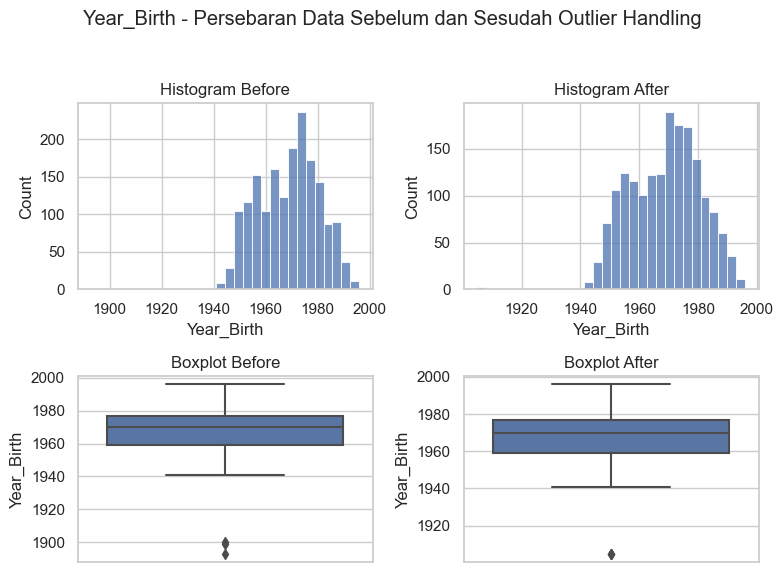

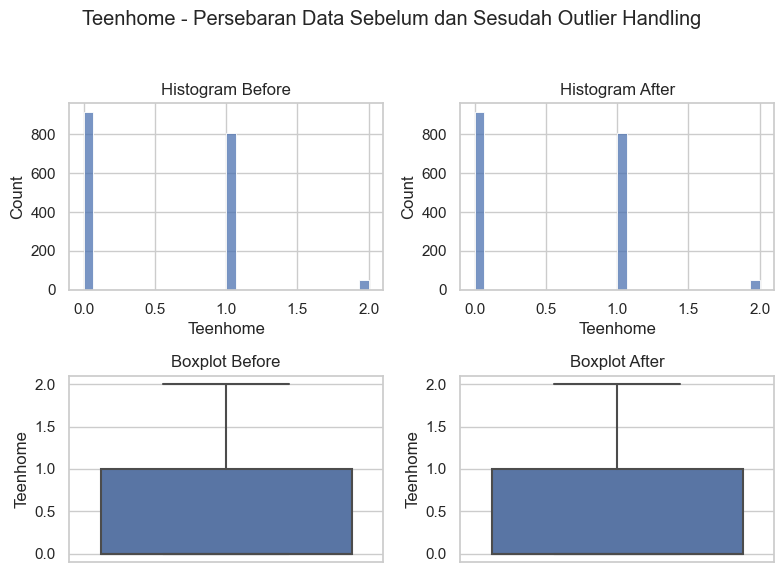

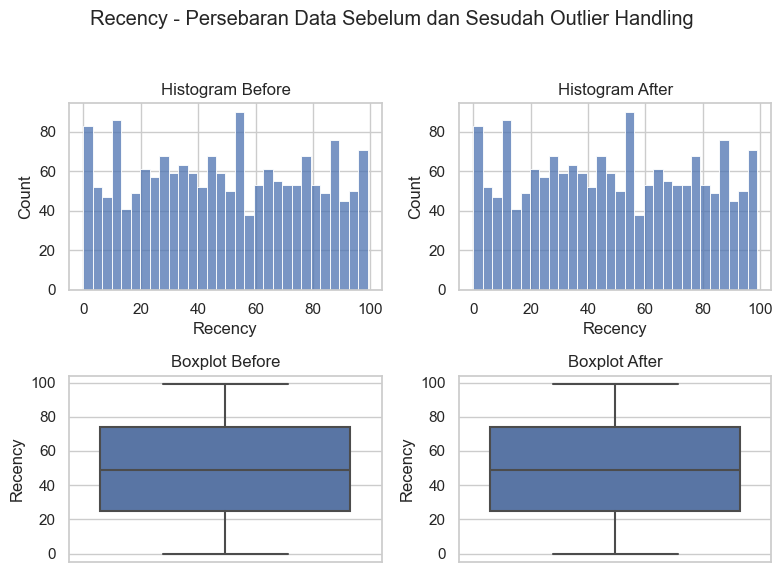

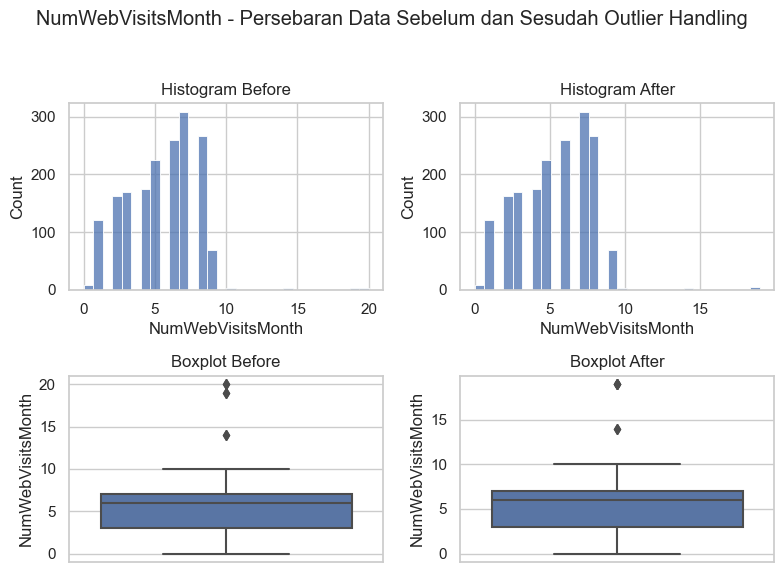

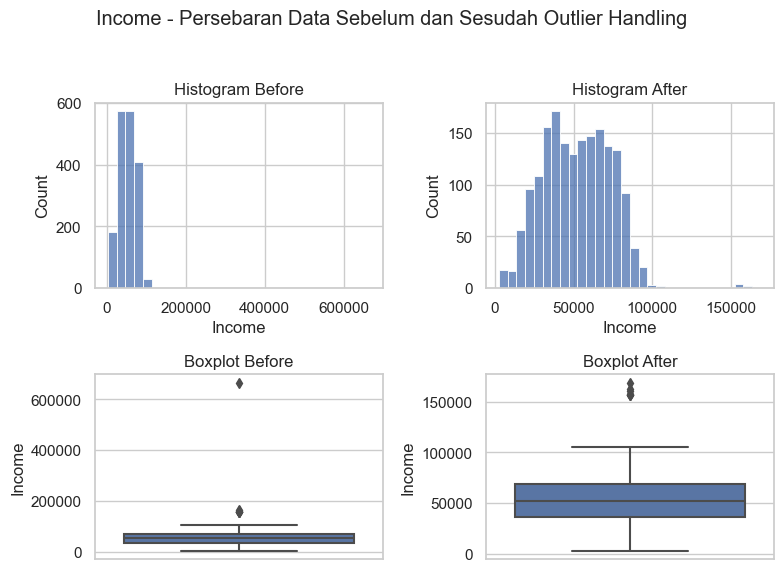

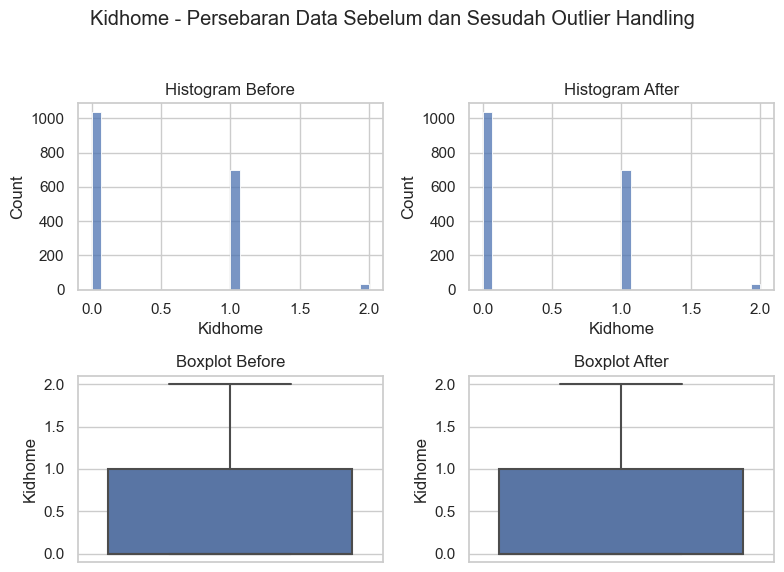

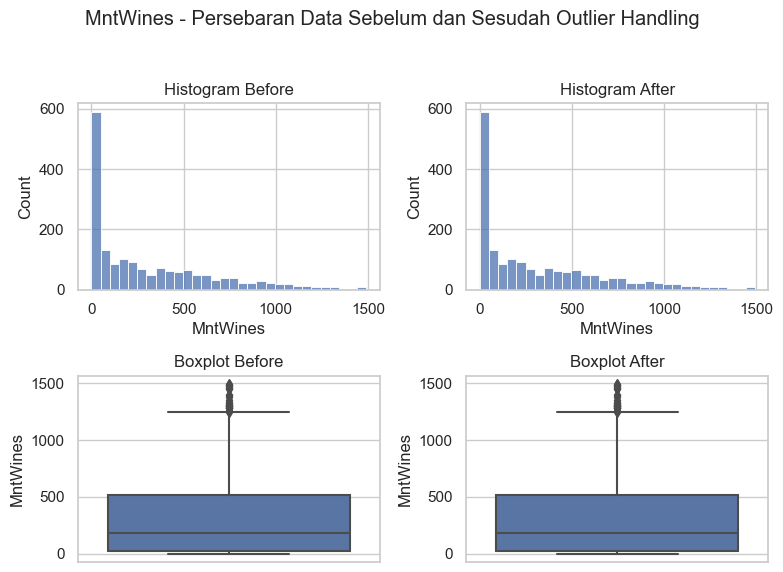

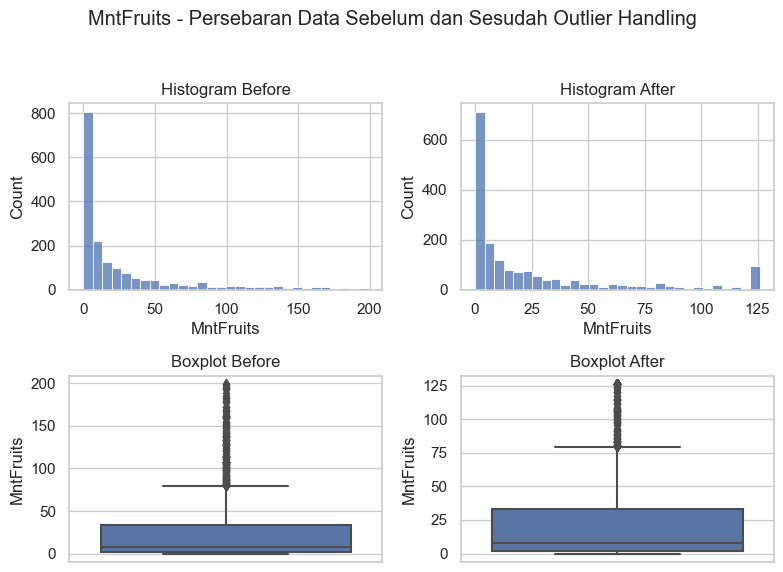

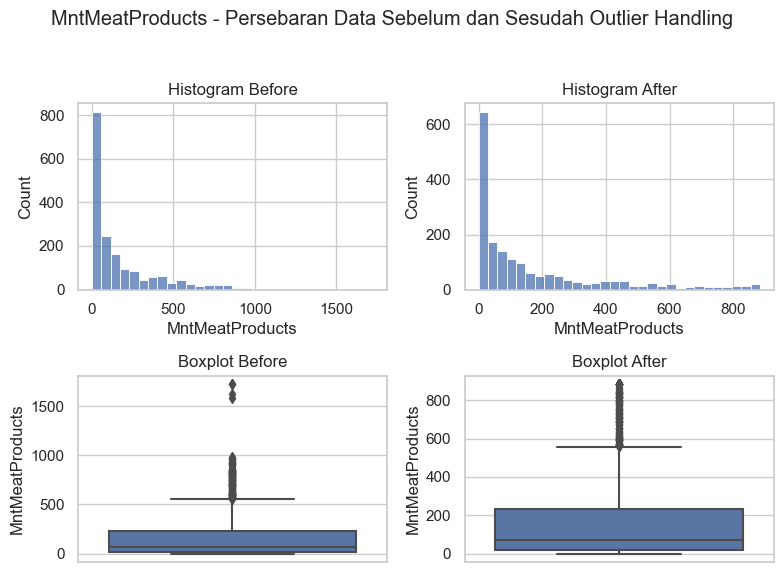

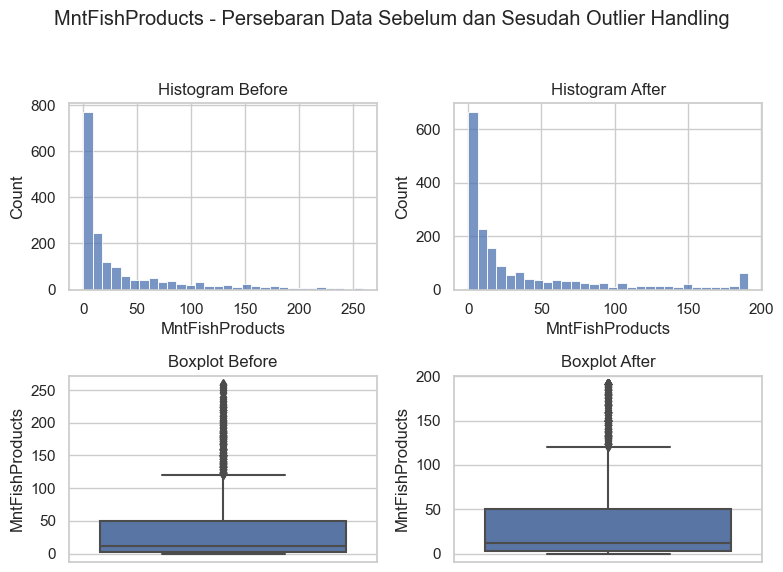

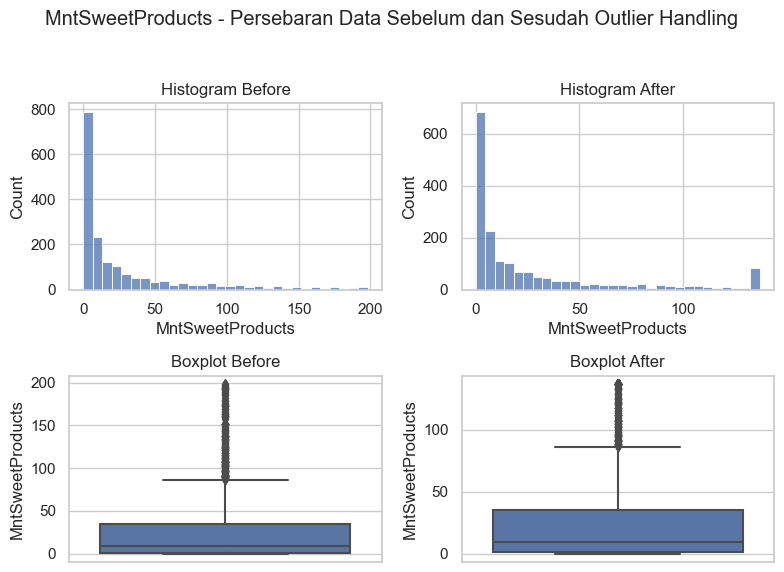

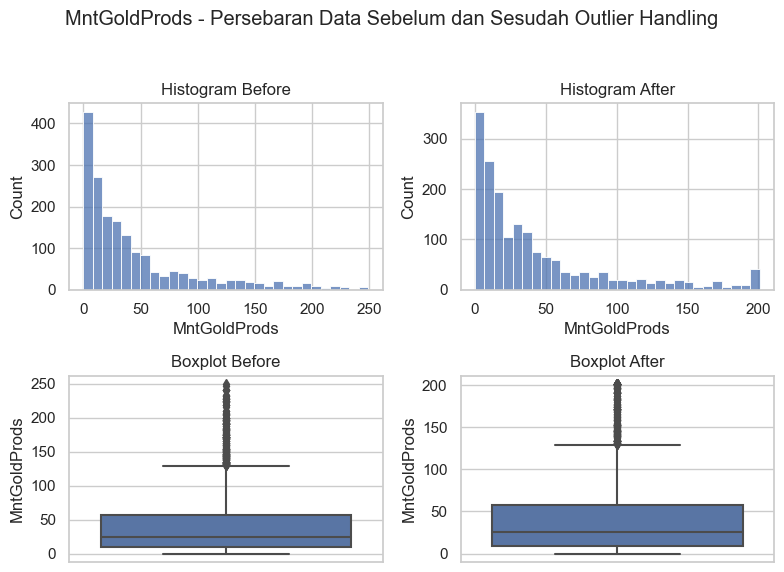

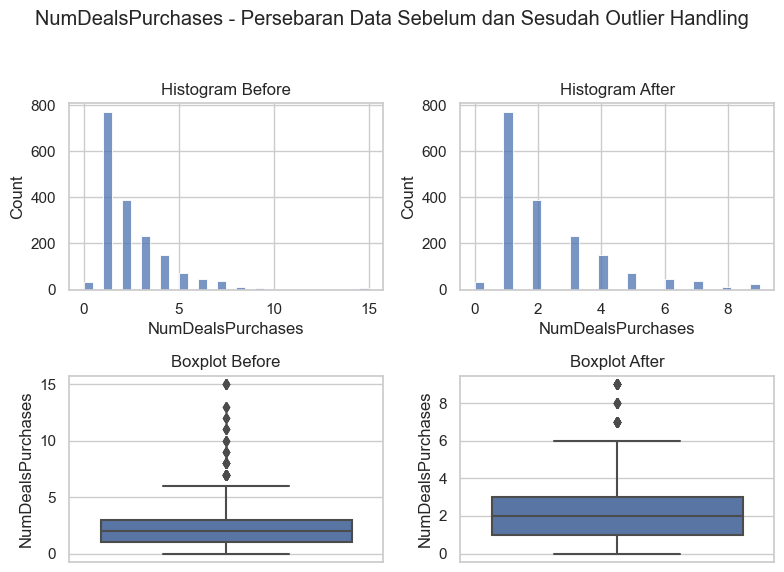

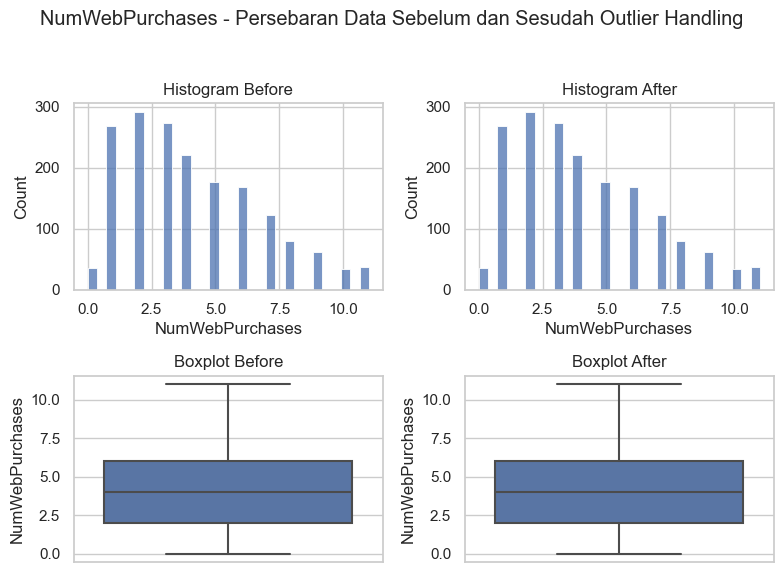

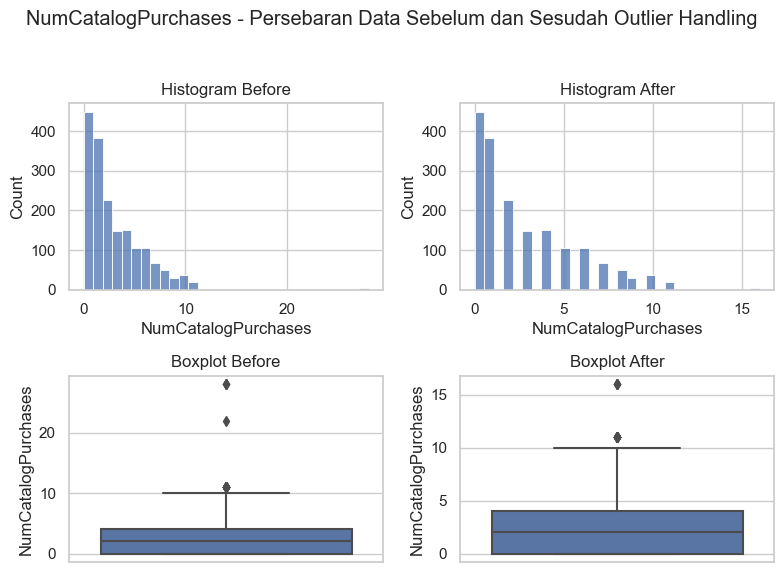

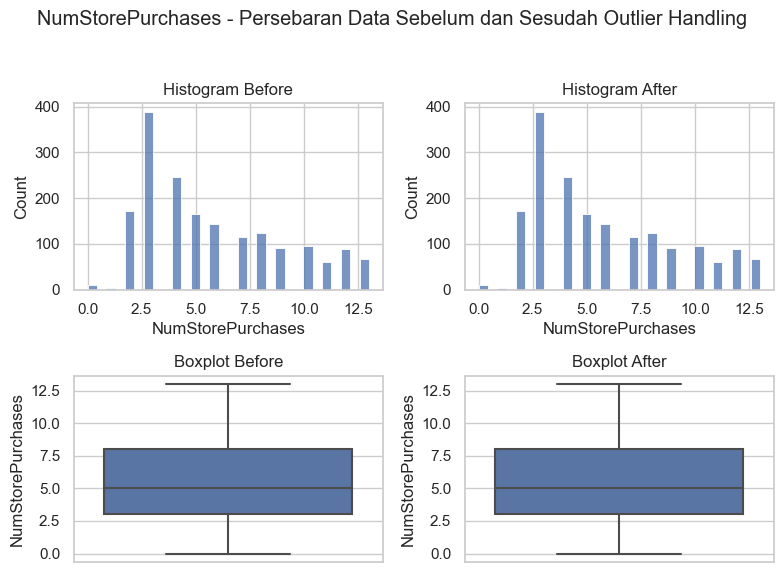

In [696]:
def outlier_handling_plot_comparison(df_before, df_after, variable):
    
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))                               
    fig.suptitle(f'{variable} - Persebaran Data Sebelum dan Sesudah Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0])
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1])
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Membandingkan data sebelum dan sesudah capping untuk setiap kolom numerik
for col in selected_cols:
    outlier_handling_plot_comparison(X_train, df_X_train_capped, col)


### Melakukan Pengecekan Korelasi Untuk Pemilihan Feature

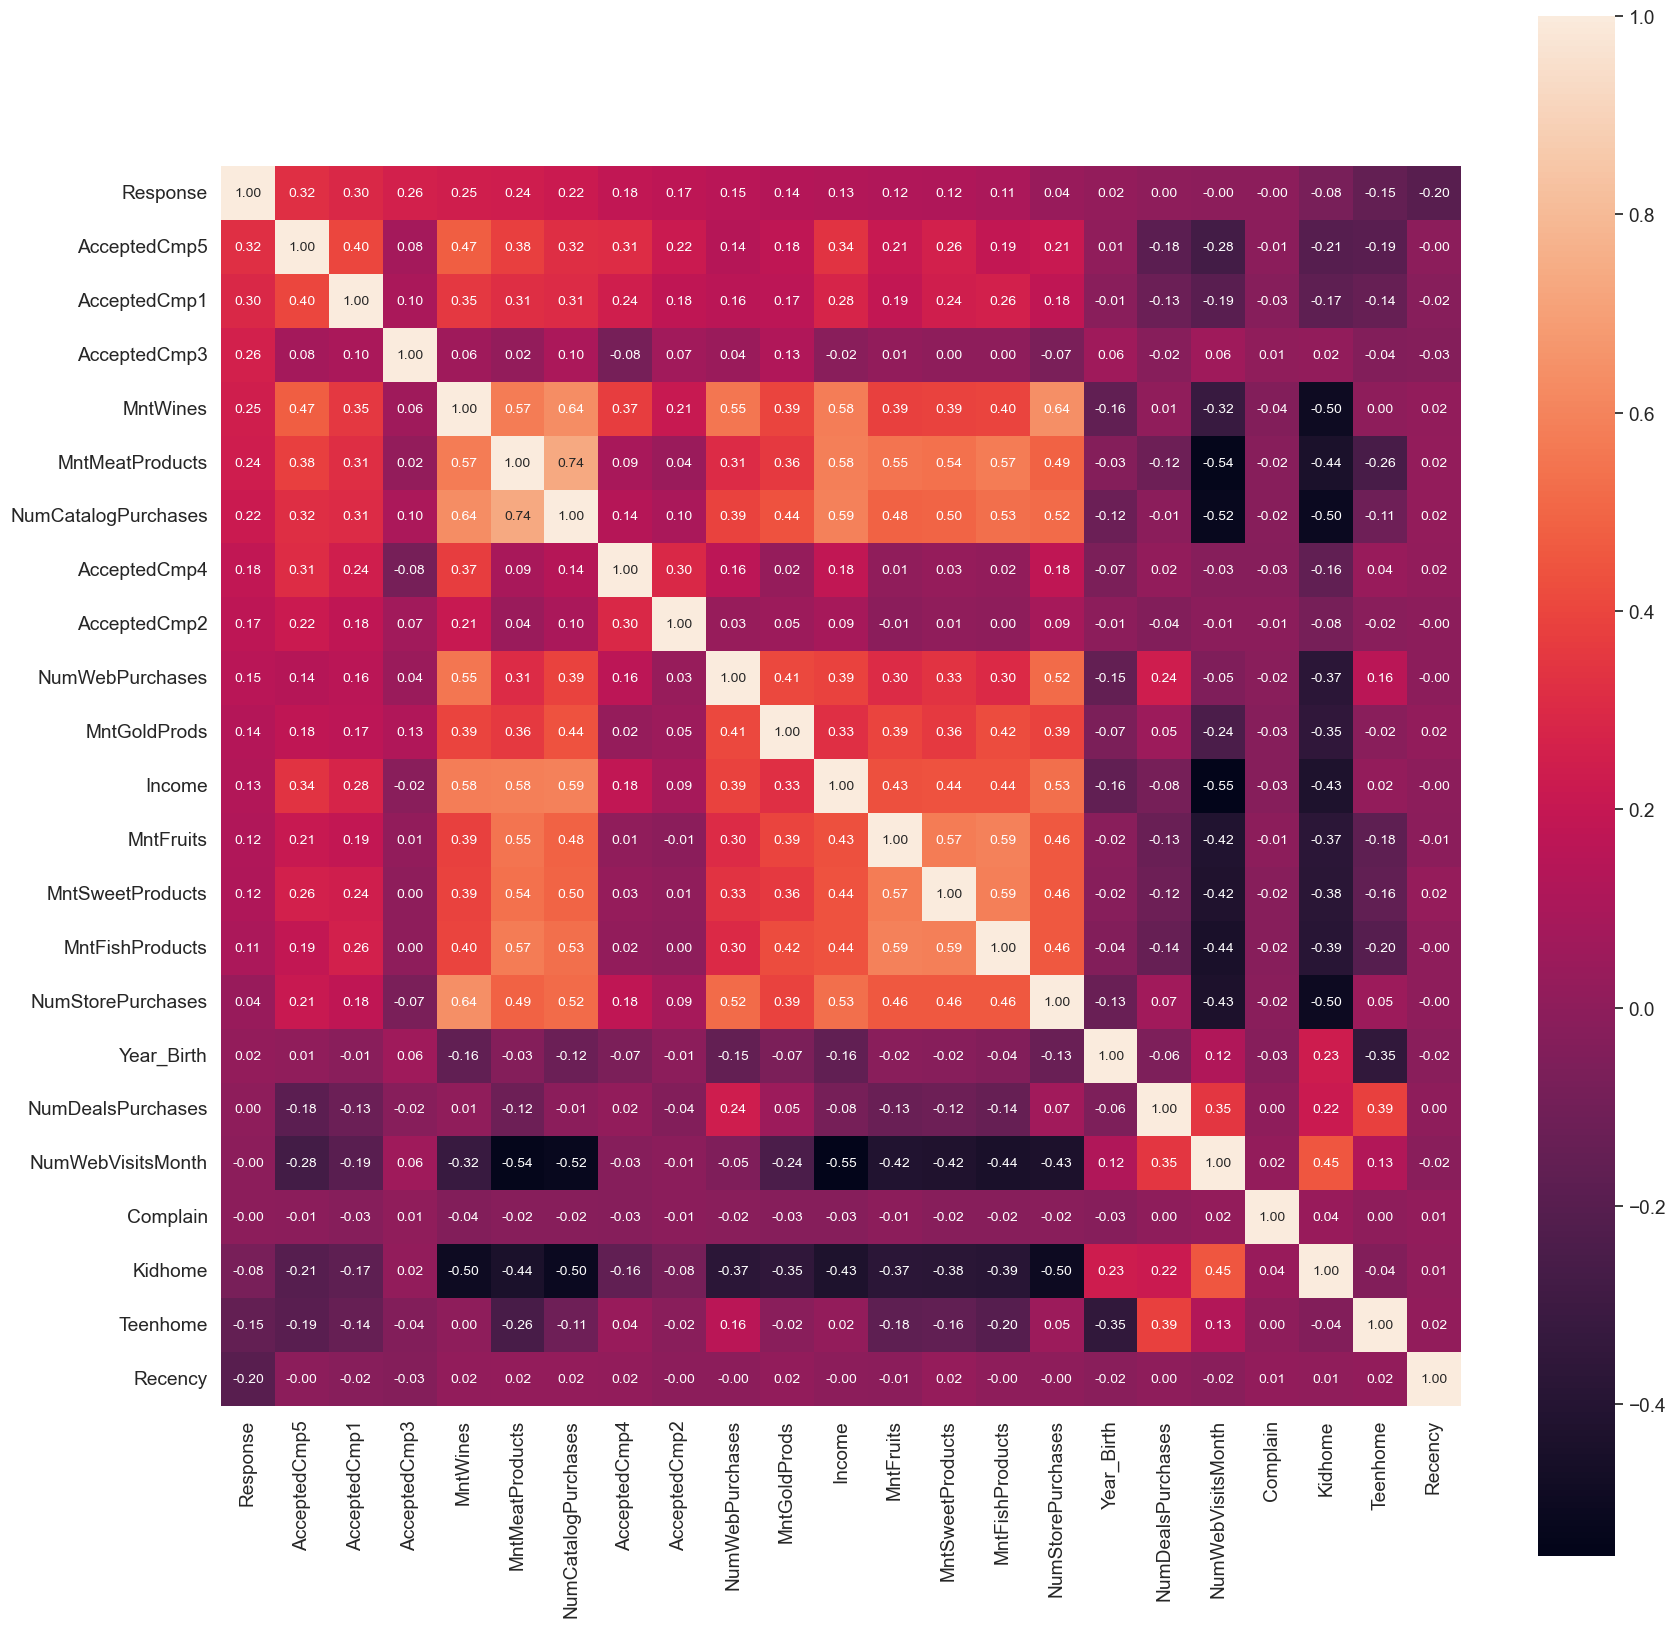

In [697]:
# Mengambil semua kolom
all_cols = df1.columns

# Menghitung nilai korelasi untuk setiap kolom berbanding dengan 'Response' dan diurutkan dari nilai terbesar
corrmat = df1.corr()
cols = corrmat.nlargest(30,'Response')['Response'].index

# Membuat heatmap
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(20,20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


    Kolom yang memiliki korespondensi dengan kolom Response diurutkan dari yang terbesar :
    AcceptedCmp5 (0.32)
    AcceptedCmp1 (0.30)
    AcceptedCmp3 (0.26)
    MntWines (0.25)
    MntMeatProducts (0.24)
    NumCatalogPurchases (0.22)
    AcceptedCmp4 (0.18)
    AcceptedCmp2 (0.17)
    NumWebPurchases (0.15)
    Recency (-0.20)
    Teenhome (-0.15)

In [698]:
'''Mengecek korelasi kolom kategorikal dengan kolom response'''
from scipy.stats import chi2_contingency

# Membuat list untuk kolom kategorikal yang ingin dianalisis
categorical_cols = ['Education', 'Marital_Status', 'Dt_Customer']

# Melakukan uji chi-square untuk setiap kolom kategorikal
for col in categorical_cols:
    contingency_table = pd.crosstab(df1[col], df1['Response'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test results for {col}:")
    print(f"Chi2 value: {chi2}")
    print(f"P-value: {p}")
    print("------------")


Chi-square test results for Education:
Chi2 value: 22.832209630093136
P-value: 0.0001367836045542766
------------
Chi-square test results for Marital_Status:
Chi2 value: 49.84113074035501
P-value: 1.4935022408909954e-09
------------
Chi-square test results for Dt_Customer:
Chi2 value: 783.0825550574414
P-value: 0.0007143576531742524
------------


In [699]:
'''Membuat data baru hanya untuk mengecek feature importance'''

df_encoded = df1.copy()

Xdummies = df_encoded.drop('Response', axis=1) 
ydummies = df_encoded['Response']

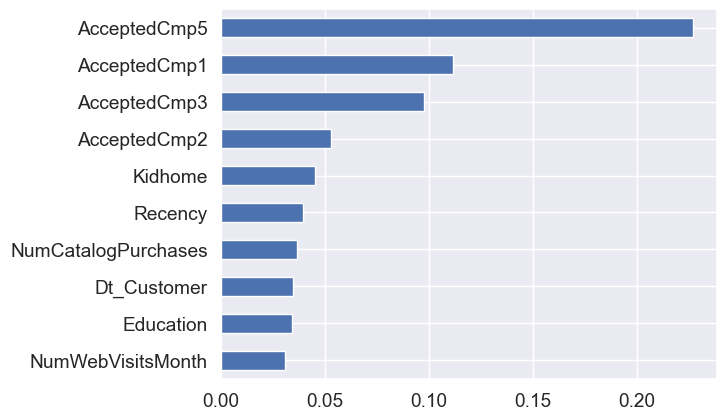

AcceptedCmp5           0.227198
AcceptedCmp1           0.111767
AcceptedCmp3           0.097445
AcceptedCmp2           0.053137
Kidhome                0.045126
Recency                0.039605
NumCatalogPurchases    0.036453
Dt_Customer            0.034834
Education              0.034133
NumWebVisitsMonth      0.030802
dtype: float32


In [765]:
label_encoder = LabelEncoder()

# Encode 'Education' and 'Marital_Status' columns
df_encoded['Education'] = label_encoder.fit_transform(df_encoded['Education'])
df_encoded['Marital_Status'] = label_encoder.fit_transform(df_encoded['Marital_Status'])
df_encoded['Dt_Customer'] = label_encoder.fit_transform(df_encoded['Dt_Customer'])

# Separate features and target variable
Xdummies = df_encoded.drop(columns=['Response'])
ydummies = df_encoded['Response']

# Initialize XGBoost model
model = XGBClassifier()

# Fit the model
model.fit(Xdummies, ydummies)

# Calculate feature importances
feat_importances = pd.Series(model.feature_importances_, index=Xdummies.columns)

# Plot the top 15 most important features
feat_importances.nlargest(10).plot(kind='barh').invert_yaxis()
plt.show()

print(feat_importances.nlargest(10))

    Model XGBClassifier disini hanya berfungsi untuk mengecek feature importance. Didapatkan urutan sesuai nilai terbesar :

    AcceptedCmp5           0.227198
    AcceptedCmp1           0.111767
    AcceptedCmp3           0.097445
    AcceptedCmp2           0.053137
    Kidhome                0.045126
    Recency                0.039605
    NumCatalogPurchases    0.036453

    Berdasarkan heatmap dengan nilai terbesar hasilnya sebagai berikut :

    AcceptedCmp5 (0.32)
    AcceptedCmp1 (0.30)
    AcceptedCmp3 (0.26)
    MntWines (0.25)
    MntMeatProducts (0.24)
    NumCatalogPurchases (0.22)
    Recency (-0.20)
    NumWebPurchases (0.15)
    Teenhome (-0.15)
    

    Berdasarkan Uji Chi Square didapatkan hasil p-value yang kecil pada ketiga kolom kategorikal yang bisa diartikan ketiganya memiliki hubungan signifikan dengan kolom Response
    
    Chi-square test results for Education:
    Chi2 value: 22.832209630093136
    P-value: 0.0001367836045542766

    Chi-square test results for Marital_Status:
    Chi2 value: 49.84113074035501
    P-value: 1.4935022408909954e-09

    Chi-square test results for Dt_Customer:
    Chi2 value: 783.0825550574414
    P-value: 0.0007143576531742524


    Kolom yangh akan dicoba dari 3 perhitungan tersebut, yaitu AcceptedCmp5, AcceptedCmp1, AcceptedCmp3, AcceptedCmp2, Recency, Kidhome, NumCatalogPurchases, MntWines, MntMeatProducts, Education, Marital Status. Keempat kolom tersebut akan dijadikan feture untuk model dalam proses berikutnya.

    

### Feature Selection

In [701]:
'''Drop kolom yang tidak digunakan'''
save_column = ['AcceptedCmp5','AcceptedCmp1','AcceptedCmp3','AcceptedCmp2','Recency', 'Kidhome', 'NumCatalogPurchases',
               'MntWines', 'MntMeatProducts', 'Education', 'Teenhome', 'NumWebPurchases']

semua_kolom = list(X_train.columns)
drop_column = list(set(semua_kolom) - set(save_column))

X_train = X_train.drop(columns=drop_column)
X_test = X_test.drop(columns=drop_column)

X_train.head()


,Education,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,NumWebPurchases,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
636,Graduation,0,0,72,387,713,9,11,0,0,0,0
797,2n Cycle,0,1,17,584,212,11,4,0,0,0,0
961,PhD,0,1,69,492,37,6,3,0,0,0,0
64,Graduation,0,0,29,398,367,7,4,0,0,0,0
1238,Graduation,1,0,56,5,13,1,0,0,0,0,0


In [702]:
'''Pengelompokkan kolom kategorikal dan numerikal'''
column_cat = ['Education']
column_num = ['AcceptedCmp5','AcceptedCmp1','AcceptedCmp3','AcceptedCmp2','Recency','Kidhome','NumCatalogPurchases']

In [703]:
'''Pemberian variabel untuk data kategorikal dan numerikal'''
X_train_cat = X_train[column_cat]
X_train_num = X_train[column_num]

X_test_cat = X_test[column_cat]
X_test_num = X_test[column_num]

X_train_cat.head()

,Education
636,Graduation
797,2n Cycle
961,PhD
64,Graduation
1238,Graduation


In [704]:
'''Menghitung VIF untuk  mengethaui tingkat independensi dari masing-masing kolom'''
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [705]:
calc_vif(X_train_num)

,variables,VIF
0,AcceptedCmp5,1.398840
1,AcceptedCmp1,1.360148
2,AcceptedCmp3,1.112275
3,AcceptedCmp2,1.076210
4,Recency,2.332408
5,Kidhome,1.583623
6,NumCatalogPurchases,1.988651


    Dapat dilihat dalam tabel diatas adalah multicollinearity dari distance dan surge multiplier. Jika nilai VIF lebih besar dari 5 maka kemungkinan kolom tersebut bergantung dengan nilai lainnya. Dari hasil pengecekan diatas tidak ada yang memiliki multicollinearity yang signifikan.

### Encoding

In [706]:
'''Load data kategorikal'''
X_train_cat.head()

,Education
636,Graduation
797,2n Cycle
961,PhD
64,Graduation
1238,Graduation


In [707]:
'''Melakukan one hot encoding'''
ohc = OneHotEncoder(sparse_output=False)
X_train_cat_encode=ohc.fit_transform(X_train_cat[['Education']])
X_test_cat_encode=ohc.transform(X_test_cat[['Education']])


X_train_cat=X_train_cat[['Education']]
X_test_cat=X_test_cat[['Education']]


X_train_cat_encoded=pd.DataFrame(X_train_cat_encode,columns=ohc.get_feature_names_out(X_train_cat.columns))
X_test_cat_encoded=pd.DataFrame(X_test_cat_encode,columns=ohc.get_feature_names_out(X_test_cat.columns))

In [708]:
'''membuat variabel baru untuk kolom yang sudah dilakukan encoding'''
column_cat2=X_train_cat_encoded.select_dtypes(include = np.number).columns.tolist()

In [709]:
'''Menampilkan data hasil encoding'''
X_train_cat_encoded.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


### Scaling

In [710]:
'''melakukan scaling'''
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[-0.28396357, -0.25998468, -0.28396357, ...,  0.80460657,
        -0.81384547,  2.77122284],
       [-0.28396357, -0.25998468, -0.28396357, ..., -1.103461  ,
        -0.81384547,  0.42466564],
       [-0.28396357, -0.25998468, -0.28396357, ...,  0.70053016,
        -0.81384547,  0.08944319],
       ...,
       [-0.28396357, -0.25998468, -0.28396357, ...,  0.87399085,
         1.05831661, -0.24577927],
       [-0.28396357, -0.25998468, -0.28396357, ..., -0.58307894,
        -0.81384547, -0.24577927],
       [-0.28396357, -0.25998468, -0.28396357, ...,  1.63721788,
         1.05831661, -0.91622418]])

### Concate

In [711]:
'''Menggabungkan Concat X_train_final dan X_test_final'''
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)

In [712]:
X_train_final = pd.DataFrame(X_train_final,columns=[column_num+column_cat2])
X_test_final  = pd.DataFrame(X_test_final,columns=[column_num+column_cat2])

## 6. Model Definition

### KNN

In [713]:
# Membuat pipeline untuk KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

print('Pipeline steps : ', knn_pipeline.steps)

Pipeline steps :  [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]


### SVM

In [714]:
# Definisikan pipeline untuk SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

print('Pipeline steps : ', svm_pipeline.steps)

Pipeline steps :  [('scaler', StandardScaler()), ('svm', SVC())]


### Decision Tree

In [715]:
# Definisikan pipeline untuk SVM
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])

print('Pipeline steps : ', dt_pipeline.steps)

Pipeline steps :  [('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())]


### Random Forest

In [716]:
# Definisikan pipeline untuk SVM
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

print('Pipeline steps : ', rf_pipeline.steps)

Pipeline steps :  [('scaler', StandardScaler()), ('rf', RandomForestClassifier())]


### XGBoost

In [717]:
# Definisikan pipeline untuk XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
])
print('Pipeline steps : ', xgb_pipeline.steps)

Pipeline steps :  [('scaler', StandardScaler()), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...))]


## 7. Model Training

### KNN

In [718]:
knn_pipeline.fit(X_train_final, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

### SVM

In [719]:
svm_pipeline.fit(X_train_final, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

### Decision Tree

In [720]:
dt_pipeline.fit(X_train_final, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])

### Random Forest

In [721]:
rf_pipeline.fit(X_train_final, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

### XGBoost

In [722]:
xgb_pipeline.fit(X_train_final, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

## 8. Model Evaluation

### KNN Predict & Evaluation

In [723]:
# Predict Train-set and Test-set
y_pred_train_knn = knn_pipeline.predict(X_train_final)
y_pred_test_knn = knn_pipeline.predict(X_test_final)

# Print classification report
print('Classification Report KNN Train: ')
print(classification_report(y_train, y_pred_train_knn))
print('Classification Report KNN Test: ')
print(classification_report(y_test, y_pred_test_knn))

Classification Report KNN Train: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1494
           1       0.79      0.46      0.58       275

    accuracy                           0.90      1769
   macro avg       0.85      0.72      0.76      1769
weighted avg       0.89      0.90      0.89      1769

Classification Report KNN Test: 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       387
           1       0.56      0.36      0.43        56

    accuracy                           0.88       443
   macro avg       0.73      0.66      0.68       443
weighted avg       0.87      0.88      0.87       443



    Model KNN memiliki tingkat akurasi yang tinggi pada data latih (90%) namun memiliki recall yang rendah untuk kelas 1 (calon konsumen yang menerima penawaran), sedangkan tujuan dibuatnya model adalah untuk memprediksi orang yang memiliki potensi untuk menjadi pelanggan.

    Model ini cenderung kurang sensitif terhadap kasus positif (recall rendah untuk kelas 1 (0.36)), yang berarti kemampuan model untuk mengidentifikasi konsumen yang benar-benar tertarik menerima penawaran masih bisa ditingkatkan.

___
    
    Precision mengukur seberapa banyak dari prediksi positif yang sebenarnya benar-benar positif. Dalam konteks pemasaran, precision mengukur seberapa akurat model dalam mengidentifikasi orang-orang yang akan menerima penawaran. Jika precision tinggi, ini berarti model cenderung memberikan sedikit false positive, yaitu orang-orang yang diprediksi akan menerima penawaran, tetapi sebenarnya tidak.
            
    Recall mengukur seberapa banyak dari kelas yang sebenarnya positif yang diprediksi dengan benar oleh model. Dalam konteks pemasaran, recall mengukur seberapa banyak dari pelanggan yang sebenarnya akan menerima penawaran yang berhasil diidentifikasi oleh model. Jika recall tinggi, model cenderung tidak melewatkan pelanggan potensial yang layak mendapat penawaran.

### SVM Predict & Evaluation

In [724]:
# Predict Train-set and Test-set
y_pred_train_svm = svm_pipeline.predict(X_train_final)
y_pred_test_svm = svm_pipeline.predict(X_test_final)

# Print classification report
print('Classification Report SVM Train: ')
print(classification_report(y_train, y_pred_train_svm))
print('Classification Report SVM Test: ')
print(classification_report(y_test, y_pred_test_svm))

Classification Report SVM Train: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1494
           1       0.83      0.38      0.52       275

    accuracy                           0.89      1769
   macro avg       0.86      0.68      0.73      1769
weighted avg       0.89      0.89      0.87      1769

Classification Report SVM Test: 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       387
           1       0.46      0.23      0.31        56

    accuracy                           0.87       443
   macro avg       0.68      0.60      0.62       443
weighted avg       0.84      0.87      0.85       443



    Model SVM memiliki tingkat akurasi yang tinggi pada data latih (89%), tetapi sama seperti KNN, nilai recall untuk kelas 1 rendah.
    Melakukan evaluasi parameter atau mencoba kernel SVM lainnya dapat dipertimbangkan untuk melihat apakah dapat meningkatkan performa model.

### Decision Tree Prediction & Evaluation

In [725]:
# Predict Train-set and Test-set
y_pred_train_dt = dt_pipeline.predict(X_train_final)
y_pred_test_dt = dt_pipeline.predict(X_test_final)

# Print classification report
print('Classification Report Decision Tree Train: ')
print(classification_report(y_train, y_pred_train_dt))
print('Classification Report Decision Tree Test: ')
print(classification_report(y_test, y_pred_test_dt))

Classification Report Decision Tree Train: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1494
           1       0.99      0.89      0.94       275

    accuracy                           0.98      1769
   macro avg       0.99      0.95      0.97      1769
weighted avg       0.98      0.98      0.98      1769

Classification Report Decision Tree Test: 
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       387
           1       0.37      0.39      0.38        56

    accuracy                           0.84       443
   macro avg       0.64      0.65      0.65       443
weighted avg       0.84      0.84      0.84       443



    Model decision tree memiliki performa yang sangat baik pada data latih dengan akurasi dan recall tinggi untuk kedua kelas.
    Namun, performa model menurun secara signifikan pada data uji, terutama pada recall untuk kelas 1.
    Model ini mungkin terlalu kompleks dan cenderung overfitting pada data latih.

### Random Forest Prediction & Evaluation

In [726]:
# Predict Train-set and Test-set
y_pred_train_rf = rf_pipeline.predict(X_train_final)
y_pred_test_rf = rf_pipeline.predict(X_test_final)

# Print classification report
print('Classification Report Random Forest Train: ')
print(classification_report(y_train, y_pred_train_rf))
print('Classification Report Random Forest Test: ')
print(classification_report(y_test, y_pred_test_rf))

Classification Report Random Forest Train: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1494
           1       0.98      0.91      0.94       275

    accuracy                           0.98      1769
   macro avg       0.98      0.95      0.97      1769
weighted avg       0.98      0.98      0.98      1769

Classification Report Random Forest Test: 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       387
           1       0.45      0.39      0.42        56

    accuracy                           0.86       443
   macro avg       0.68      0.66      0.67       443
weighted avg       0.85      0.86      0.86       443



    Model memiliki tingkat akurasi yang tinggi pada data latih dan cenderung overfitting (akurasi lebih tinggi pada data latih dibandingkan data uji).
    Performa pada recall kelas 1 untuk data uji adalah yang paling tinggi bersama dengan model XGBoost. berdasarkan nilai tersebut maka model ini akan digunakan untuk memprediksi konsumen yang memiliki potensi untuk menjadi pelanggan.

### XGBoost Prediction & Evaluation

In [780]:
# Predict Train-set and Test-set
y_pred_train_xgb = xgb_pipeline.predict(X_train_final)
y_pred_test_xgb = xgb_pipeline.predict(X_test_final)

# Print classification report
print('Classification Report XGBoost Train: ')
print(classification_report(y_train, y_pred_train_xgb))
print('Classification Report XGBoost Test: ')
print(classification_report(y_test, y_pred_test_xgb))

Classification Report XGBoost Train: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1494
           1       0.96      0.72      0.82       275

    accuracy                           0.95      1769
   macro avg       0.96      0.86      0.90      1769
weighted avg       0.95      0.95      0.95      1769

Classification Report XGBoost Test: 
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       387
           1       0.48      0.38      0.42        56

    accuracy                           0.87       443
   macro avg       0.69      0.66      0.67       443
weighted avg       0.86      0.87      0.86       443



    Model memiliki tingkat akurasi yang tinggi pada data latih (95%), namun terlihat overfitting karena terdapat penurunan performa yang signifikan pada data uji (akurasi turun menjadi 87%).
    Recall untuk kelas 1 pada data latih (72%) dan data uji (38%) menunjukkan bahwa model cenderung kurang sensitif terhadap kasus positif atau calon konsumen yang menerima penawaran.


### Cross Validation

#### KNN

In [769]:
#Cross Validation SVM

knn_prc_train_cross_val = cross_val_score(knn_pipeline,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('KNN Recall Score - All - Cross Validation  : ', knn_prc_train_cross_val)
print('KNN Recall Score - Mean - Cross Validation : ', knn_prc_train_cross_val.mean())
print('KNN Recall Score - Std - Cross Validation  : ', knn_prc_train_cross_val.std())
print('KNN Recall Score - Range of Test-Set       : ', (knn_prc_train_cross_val.mean()-knn_prc_train_cross_val.std()) , '-', (knn_prc_train_cross_val.mean()+knn_prc_train_cross_val.std()))

KNN Recall Score - All - Cross Validation  :  [0.34782609 0.34782609 0.37362637]
KNN Recall Score - Mean - Cross Validation :  0.356426182513139
KNN Recall Score - Std - Cross Validation  :  0.012162371773872778
KNN Recall Score - Range of Test-Set       :  0.3442638107392662 - 0.3685885542870118


    Rata-rata recall dari cross-validation adalah sekitar 0.356, dengan variasi sekitar 0.012.
    Rentang recall pada set pengujian (test set) adalah antara 0.344 hingga 0.369.
    KNN memiliki nilai recall yang cukup konsisten namun tidak terlalu tinggi.

#### SVM

In [768]:
#Cross Validation SVM

svm_prc_train_cross_val = cross_val_score(svm_pipeline,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('SVM Recall Score - All - Cross Validation  : ', svm_prc_train_cross_val)
print('SVM Recall Score - Mean - Cross Validation : ', svm_prc_train_cross_val.mean())
print('SVM Recall Score - Std - Cross Validation  : ', svm_prc_train_cross_val.std())
print('SVM Recall Score - Range of Test-Set       : ', (svm_prc_train_cross_val.mean()-svm_prc_train_cross_val.std()) , '-', (svm_prc_train_cross_val.mean()+svm_prc_train_cross_val.std()))

SVM Recall Score - All - Cross Validation  :  [0.34782609 0.27173913 0.28571429]
SVM Recall Score - Mean - Cross Validation :  0.30175983436853
SVM Recall Score - Std - Cross Validation  :  0.03306963321938569
SVM Recall Score - Range of Test-Set       :  0.2686902011491443 - 0.33482946758791565


#### Decision Tree

In [770]:
#Cross Validation SVM

dt_prc_train_cross_val = cross_val_score(dt_pipeline,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Decision Tree Recall Score - All - Cross Validation  : ', dt_prc_train_cross_val)
print('Decision Tree Recall Score - Mean - Cross Validation : ', dt_prc_train_cross_val.mean())
print('Decision Tree Recall Score - Std - Cross Validation  : ', dt_prc_train_cross_val.std())
print('Decision Tree Recall Score - Range of Test-Set       : ', (dt_prc_train_cross_val.mean()-dt_prc_train_cross_val.std()) , '-', (dt_prc_train_cross_val.mean()+dt_prc_train_cross_val.std()))

Decision Tree Recall Score - All - Cross Validation  :  [0.36956522 0.5326087  0.48351648]
Decision Tree Recall Score - Mean - Cross Validation :  0.46189679885332063
Decision Tree Recall Score - Std - Cross Validation  :  0.06829520248915301
Decision Tree Recall Score - Range of Test-Set       :  0.39360159636416764 - 0.5301920013424737


    Rata-rata recall dari cross-validation adalah sekitar 0.462, dengan variasi sekitar 0.068.
    Rentang recall pada set pengujian adalah antara 0.394 hingga 0.530.
    Decision Tree memiliki recall yang cukup tinggi, tetapi variasinya cukup besar. Hal ini mengindikasikan bahwa kemungkinan model sensitif terhadap perubahan dalam data atau parameter.

#### Random Forest

In [783]:
#Cross Validation SVM

rf_prc_train_cross_val = cross_val_score(rf_pipeline,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Random Forest Recall Score - All - Cross Validation  : ', rf_prc_train_cross_val)
print('Random Forest Recall Score - Mean - Cross Validation : ', rf_prc_train_cross_val.mean())
print('Random Forest Recall Score - Std - Cross Validation  : ', rf_prc_train_cross_val.std())
print('Random Forest Recall Score - Range of Test-Set       : ', (rf_prc_train_cross_val.mean()-rf_prc_train_cross_val.std()) , '-', (rf_prc_train_cross_val.mean()+rf_prc_train_cross_val.std()))

Random Forest Recall Score - All - Cross Validation  :  [0.36956522 0.48913043 0.49450549]
Random Forest Recall Score - Mean - Cross Validation :  0.45106704889313587
Random Forest Recall Score - Std - Cross Validation  :  0.05767225919146252
Random Forest Recall Score - Range of Test-Set       :  0.39339478970167335 - 0.5087393080845984


    Rata-rata recall dari cross-validation adalah sekitar 0.451, dengan standar deviasi sekitar 0.058. 
    Ini menunjukkan bahwa rata-rata recall yang dihasilkan oleh model adalah sekitar 45.1%

#### XGBoost

In [785]:
#Cross Validation SVM

xgb_prc_train_cross_val = cross_val_score(xgb_pipeline,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('XGBoost Recall Score - All - Cross Validation  : ', xgb_prc_train_cross_val)
print('XGBoost Recall Score - Mean - Cross Validation : ', xgb_prc_train_cross_val.mean())
print('XGBoost Recall Score - Std - Cross Validation  : ', xgb_prc_train_cross_val.std())
print('XGBoost Recall Score - Range of Test-Set       : ', (xgb_prc_train_cross_val.mean()-xgb_prc_train_cross_val.std()) , '-', (xgb_prc_train_cross_val.mean()+xgb_prc_train_cross_val.std()))

XGBoost Recall Score - All - Cross Validation  :  [0.39130435 0.47826087 0.37362637]
XGBoost Recall Score - Mean - Cross Validation :  0.41439719700589267
XGBoost Recall Score - Std - Cross Validation  :  0.04573149314221669
XGBoost Recall Score - Range of Test-Set       :  0.368665703863676 - 0.46012869014810936


    Rata-rata recall dari cross-validation adalah sekitar 0.414, dengan variasi sekitar 0.046.
    Rentang recall pada set pengujian adalah antara 0.369 hingga 0.460.
    XGBoost menunjukkan hasil yang cukup baik dengan recall yang stabil

### Hyperparameter Tuning

In [777]:
'''Melakukan tuning untuk model random forest'''

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='recall')
rf_random.fit(X_train_final, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='recall', verbose=2)

In [778]:
print("Best parameters found: ", rf_random.best_params_)
best_rf_model = rf_random.best_estimator_

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


In [786]:
# Predict Train-set and Test-set
y_pred_train_rf_random = rf_random.predict(X_train_final)
y_pred_test_rf_random = rf_random.predict(X_test_final)

# Print classification report
print('Classification Report Random Forest Train After Tuning: ')
print(classification_report(y_train, y_pred_train_rf_random))
print('Classification Report Random Forest Test After Tuning: ')
print(classification_report(y_test, y_pred_test_rf_random))

Classification Report Random Forest Train After Tuning: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1494
           1       0.97      0.88      0.92       275

    accuracy                           0.98      1769
   macro avg       0.97      0.94      0.95      1769
weighted avg       0.98      0.98      0.98      1769

Classification Report Random Forest Test After Tuning: 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       387
           1       0.42      0.41      0.41        56

    accuracy                           0.85       443
   macro avg       0.67      0.66      0.67       443
weighted avg       0.85      0.85      0.85       443



    Sebelum Penyetelan (Sebelum Tuning):

    Data Latih:
    Precision untuk kelas 1 (pelanggan yang menerima penawaran) sangat tinggi, yaitu 98%. Artinya, dari semua pelanggan yang diprediksi menerima penawaran, 98% dari mereka benar-benar menerima.
    Recall untuk kelas 1 adalah 91%. Ini berarti model berhasil mengidentifikasi 91% dari semua pelanggan yang sebenarnya menerima penawaran.
    F1-score untuk kelas 1 adalah 94%, yang merupakan keseimbangan antara precision dan recall. Semakin tinggi F1-score, semakin baik keseimbangannya.
    
    Data Uji:
    Precision dan recall untuk kelas 1 sedikit rendah, yaitu sekitar 45% dan 39% masing-masing. Hal ini menunjukkan bahwa model cenderung kurang akurat dalam memprediksi pelanggan yang sebenarnya menerima penawaran.
    Akurasi total pada data uji adalah 86%, yang merupakan tingkat keberhasilan keseluruhan model dalam memprediksi kelas dengan benar.

___

    Setelah Penyetelan (Setelah Tuning):

    Data Latih:
    Recall untuk kelas 1 mengalami penurunan menjadi 88%, meskipun precision tetap tinggi di 97%. Artinya, meskipun model masih sangat baik dalam memprediksi pelanggan yang benar-benar menerima penawaran, namun tidak sebaik sebelumnya dalam mengidentifikasi semua pelanggan yang sebenarnya menerima penawaran.
    
    Data Uji:
    Recall untuk kelas 1 naik menjadi 41%, sementara precision tetap rendah di sekitar 42%. Meskipun ada peningkatan namun peningkatan tersebut kurang signifikan.

## 10. Model Saving

In [758]:
# menyimpan model yang sudah dibuat
with open('list_num_cols.txt', 'w') as file_num_cols:
  json.dump(column_num, file_num_cols)

with open('list_cat_cols.txt', 'w') as file_cat_cols:
  json.dump(column_cat, file_cat_cols)

with open('scaler.pkl', 'wb') as file_scaler:
  pickle.dump(scaler, file_scaler)

with open('encoder.pkl', 'wb') as file_encoder:
  pickle.dump(ohc, file_encoder)

with open('model_random_forest.pkl', 'wb') as file_model:
  pickle.dump(rf_pipeline, file_model)

## 11. Model Inference

## 12. Kesimpulan

**KNN (K-Nearest Neighbors):**

Model Evaluation: Model KNN memiliki akurasi yang cukup tinggi pada data latih, namun performanya menurun pada data uji, terutama dalam hal recall untuk kelas 1 (menerima penawaran).
Cross Validation: Hasil cross-validation menunjukkan konsistensi yang baik dalam kinerja model, meskipun recall untuk kelas 1 tetap rendah.
Hyperparameter Tuning: Tidak ada informasi tentang tuning hyperparameter untuk model KNN.
SVM (Support Vector Machine):

**SVM**

Model Evaluation: SVM memberikan akurasi yang baik pada data latih, namun performanya menurun pada data uji, terutama dalam hal recall untuk kelas 1.
Cross Validation: Cross-validation menunjukkan variasi yang cukup besar dalam kinerja model, dengan recall yang rendah untuk kelas 1.
Hyperparameter Tuning: Tidak ada informasi tentang tuning hyperparameter untuk model SVM.
Decision Tree:


**Decision Tree**

Model Evaluation: Decision tree memiliki performa yang baik pada data latih, namun performanya menurun pada data uji, terutama dalam hal recall untuk kelas 1.
Cross Validation: Hasil cross-validation menunjukkan variasi yang signifikan dalam kinerja model, dengan recall yang rendah untuk kelas 1.
Hyperparameter Tuning: Tidak ada informasi tentang tuning hyperparameter untuk model Decision Tree.
Random Forest:

**Random Forest**

Model Evaluation: Random Forest memberikan performa yang baik pada data latih, namun juga mengalami penurunan performa pada data uji, terutama dalam hal recall untuk kelas 1.
Cross Validation: Cross-validation menunjukkan variasi yang cukup besar dalam kinerja model, tetapi recall untuk kelas 1 relatif stabil.
Hyperparameter Tuning: Hasil tuning hyperparameter menunjukkan peningkatan yang sedikit dalam recall untuk kelas 1.
XGBoost:

**XGBoost**

Model Evaluation: XGBoost memiliki performa yang baik pada data latih, namun performanya juga menurun pada data uji, terutama dalam hal recall untuk kelas 1.
Cross Validation: Hasil cross-validation menunjukkan variasi yang sedang dalam kinerja model, dengan recall yang cukup stabil untuk kelas 1.
Hyperparameter Tuning: Tidak ada informasi tentang tuning hyperparameter untuk model XGBoost.

    Secara garis besar, beberapa model menunjukkan performa yang baik pada data latih namun cenderung mengalami penurunan performa pada data uji, khususnya dalam nilai recall untuk kelas 1. Hal ini menunjukkan adanya masalah generalisasi pada model-model tersebut. Selain itu, variasi dalam kinerja model yang terlihat dalam hasil cross-validation menunjukkan bahwa model-model tersebut tidak cukup stabil dalam memprediksi data baru. Pemilihan model random forest dilakukan karena melihat performa yang cukup stabil baik secara data latih maupun data uji ketika dibandingkan dengan model lainnya

    Tuning hyperparameter pada Random Forest tampaknya memberikan sedikit peningkatan pada nilai recall untuk kelas 1, namun masih diperlukan evaluasi lebih lanjut untuk memastikan keefektifan peningkatan tersebut. Lebih lanjut, evaluasi model secara berkala dan pemantauan performa dapat membantu dalam mengidentifikasi dan menangani masalah yang muncul seiring waktu.

    Eksplorasi model lain patut dipertimbangkan Meskipun Random Forest memberikan performa yang baik karena tidak ada salahnya untuk menjelajahi model lain seperti Gradient Boosting, Support Vector Machine (SVM), atau model lainnya jika memungkinkan. Eksplorasi model lain dapat membantu dalam menemukan model yang lebih optimal untuk kasus ini.

___

**Masukkan untuk Tim Marketing:**

Targeting Pelanggan: Model Random Forest dapat digunakan untuk mengidentifikasi calon konsumen yang berpotensi menerima penawaran. Fokuskan upaya pemasaran pada pelanggan yang memiliki probabilitas tinggi untuk menerima penawaran berdasarkan prediksi model.

Segmentasi Pelanggan: Analisis lebih lanjut dapat dilakukan untuk mengidentifikasi pola dan karakteristik pelanggan yang cenderung menerima penawaran. Ini dapat membantu tim marketing dalam mengembangkan strategi segmentasi yang lebih efektif.

Personalisasi Penawaran: Dengan menggunakan informasi dari model, tim marketing dapat membuat penawaran yang lebih personal dan sesuai dengan preferensi dan kebutuhan masing-masing pelanggan, meningkatkan kemungkinan kesuksesan kampanye pemasaran.

Evaluasi Kembali Kualitas Data: Selain itu, penting untuk terus melakukan evaluasi terhadap kualitas data yang digunakan untuk melatih model. Pastikan data yang digunakan terus diperbarui dan memiliki kualitas yang baik untuk memastikan performa model yang optimal.

Monitoring dan Evaluasi Reguler: Lakukan pemantauan dan evaluasi reguler terhadap performa model untuk memastikan bahwa model tetap efektif dan relevan seiring waktu. Jika diperlukan, lakukan penyesuaian atau pembaruan terhadap model untuk menjaga kualitas prediksinya.

Dengan memanfaatkan model Random Forest dan insight yang diberikan, diharapkan tim marketing dapat meningkatkan efektivitas dan efisiensi dari kampanye pemasaran mereka, serta mendapatkan pemahaman yang lebih baik tentang preferensi dan perilaku konsumen.



## Konseptual Problem

Jawab pertanyaan berikut:

Apakah yang dimaksud dengan coeficient pada logistic regression?
  
    Coefficient adalah nilai yang menunjukkan seberapa besar pengaruh setiap fitur terhadap hasil prediksi dalam model regresi logistik. Coefficient menunjukkan arah (positif atau negatif) dan kekuatan hubungan antara fitur dengankelas atau probabilitas prediksi.

Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

    Parameter kernel pada SVM adalah fungsi matematis yang digunakan untuk mengubah data input ke dalam ruang dimensi yang lebih tinggi sehingga dapat dipisahkan dengan baik oleh sebuah hyperplane. Salah satu kernel yang umum digunakan adalah kernel RBF (Radial Basis Function), yang mengukur jarak antara titik data dengan titik referensi tertentu, yang disebut sebagai "pusat".

Bagaimana cara memilih K yang optimal pada KNN ?

    K pada KNN (K-Nearest Neighbors) adalah jumlah tetangga terdekat yang akan digunakan untuk menentukan kelas suatu titik data. K optimal biasanya dipilih melalui teknik cross-validation, di mana kita membagi data menjadi subset pelatihan dan validasi, dan mencoba berbagai nilai K untuk melihat mana yang memberikan kinerja terbaik pada data validasi.

Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

    Accuracy: Mengukur seberapa sering model memprediksi dengan benar, dinyatakan dalam persentase.
    Precision: Mengukur proporsi positif yang diidentifikasi dengan benar dari keseluruhan hasil yang diprediksi positif.
    Recall: Mengukur proporsi positif yang diidentifikasi dengan benar dari semua kelas positif yang sebenarnya.
    F1 Score: Menggabungkan precision dan recall ke dalam satu skor tunggal. Berguna ketika kelas target tidak seimbang.
    Kapan Menggunakannya:

    Accuracy: Cocok untuk data yang seimbang, di mana setiap kelas memiliki frekuensi yang sama.
    Precision dan Recall: Cocok untuk situasi di mana kesalahan false positive atau false negative memiliki konsekuensi yang berbeda, misalnya dalam deteksi penyakit.
    F1 Score: Cocok ketika terdapat ketidakseimbangan kelas dan ingin mencari keseimbangan antara precision dan recall